In [12]:
import numpy
from etrade.spot.trader import Station
from etrade.spot.market.recycle import BasicRecycle, PointwiseRecycle
from etrade.spot.forecast.market import DistributiveSeries, DistributiveMarket
from etrade.spot.forecast.plan_a.constructor import *
from etrade.spot.forecast import yieldindex
from  data_utils.stochastic_utils.vdistributions.abstract import AbstractDistribution
from  data_utils.stochastic_utils.vdistributions.parameter.continuous.basic import NormalDistribution, SkewNormalDistribution
from data_utils.stochastic_utils.vdistributions.tools.divergence import kl_divergence_continuous, crps

from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.mfk.skewnd2 import dof_snd_fitter

from scipy.optimize import differential_evolution

from matplotlib import pyplot

In [13]:
aq = OrdinaryGaussianKernelDistributionConstructor((20, 50), (1, 10), (2, 8))
dp = OrdinaryGaussianKernelDistributionConstructor((0, 5), (0, 5), (2, 8))
rp = OrdinaryGaussianKernelDistributionConstructor((0, 5), (0, 5), (2, 8))

In [14]:
mc = MarketConstructor(aq, dp, rp)
s = Station("station", 50)
br = PointwiseRecycle(0.5,1.05)

In [15]:
real_market_distribution = mc.clamped_random(4, (0, 50), (0, numpy.inf), (0, numpy.inf))
predicted_market_distribtion = mc.clamped_random(4, (0, 50), (0, numpy.inf), (0, numpy.inf))

In [16]:
observed_data = real_market_distribution.observe()

In [17]:
real_aq_mean = real_market_distribution.mean(1000)[0]
predicted_aq_mean = predicted_market_distribtion.mean(1000)[0]

In [18]:
optimized_x = predicted_market_distribtion.power_generation_optimizer(s, br).x

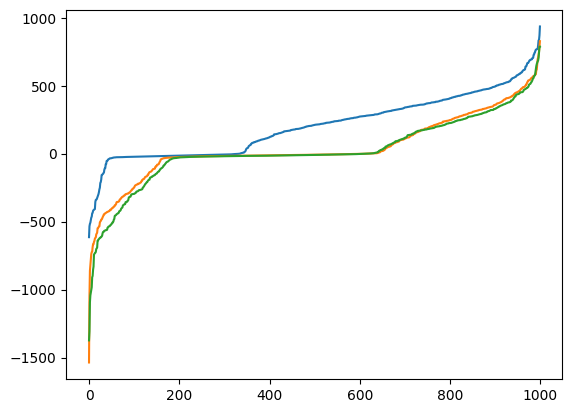

In [19]:
pyplot.plot(numpy.sort(real_market_distribution.market_trade(s, br, real_aq_mean)))
pyplot.plot(numpy.sort(real_market_distribution.market_trade(s, br, optimized_x)))
pyplot.plot(numpy.sort(real_market_distribution.market_trade(s, br, predicted_aq_mean)))

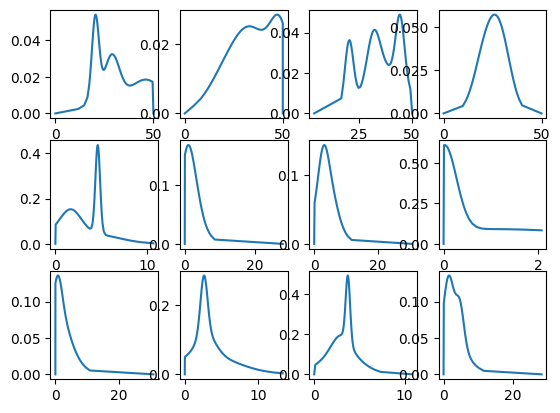

In [20]:
real_market_distribution.plot(1)

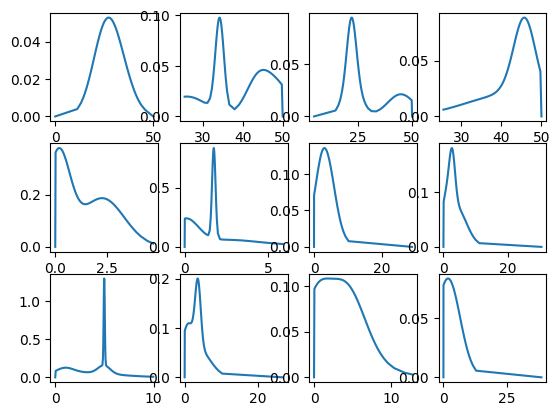

In [21]:
predicted_market_distribtion.plot(1)

0.673469387755102
0.7142857142857143
0.7346938775510204
0.7142857142857143
0.7142857142857143
0.6938775510204082
0.6938775510204082
0.6938775510204082
0.7142857142857143
0.7040816326530612


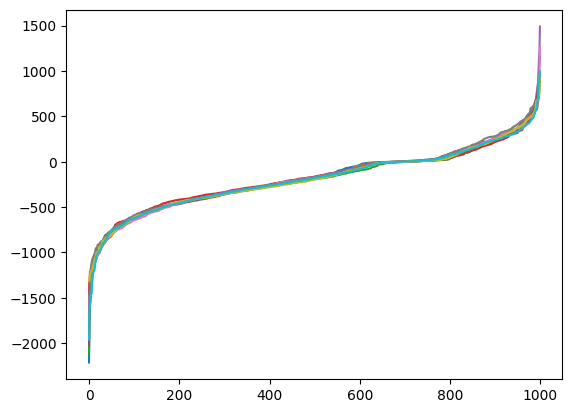

In [22]:
for _ in range(10):
    print(
        yieldindex.zero_quantile(
            # real_market_distribution.market_trade(s, br, optimized_x),
            real_market_distribution.market_trade(s, br, predicted_aq_mean),
            real_market_distribution.market_trade(s, br, real_aq_mean)
        )
    )
    pyplot.plot(
        # yieldindex.difference_quantile(
        #     real_market_distribution.market_trade(s, br, optimized_x),
        #     real_market_distribution.market_trade(s, br, real_aq_mean)
        # )
        numpy.sort(
            real_market_distribution.market_trade(s, br, predicted_aq_mean) - real_market_distribution.market_trade(s, br, real_aq_mean)
        )
    )

In [25]:
real_market_distribution.rvf(1000)[0]

array([[40.5649291 , 25.10967487, 18.47249318, ..., 42.10356739,
        49.90833348, 22.01376218],
       [50.00003318, 50.00003318, 37.76596648, ..., 37.24631424,
        30.53108729, 38.37069454],
       [30.82529294, 36.44958337, 33.17187939, ..., 41.6050902 ,
         7.57133672, 32.81167074],
       [18.84592602, 24.48053419, 19.1342431 , ..., 16.76107617,
        24.75516778, 24.97319433]])